### CREDIT APPROVALS

In this case study, we will analyze which customers are able to get credit card based on the available data from UCI repository.


https://archive.ics.uci.edu/dataset/27/credit+approval

Quinlan, J. (1987). Credit Approval [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5FS30.


In our analysis we deal with classic Classification problem. We will compare `Logistic Regression` and `Random Forest`. Other algorithms like `XGBoost Classifier` can be used.

In [1]:
# Data wrangling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data pre-processing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Model selection
from sklearn.model_selection import train_test_split

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Model training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Model evaluation
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

c:\Users\karol\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\karol\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
url = "https://raw.githubusercontent.com/Dev1402/Credit-Card-Approval/refs/heads/master/datasets/cc_approvals.data"
data = pd.read_csv(url, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [3]:
# Change the column names
cols = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']
data.columns = cols
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### Data pre-processing

In [4]:
data.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

We will change datatypes for columns A2, A14, A16, deal with unnecessary characters and NaNs.

In [5]:
# Column A2
data = data.replace('?', np.nan)

In [6]:
data.dropna(inplace=True)

In [7]:
data.isna().sum()/len(data)

A1     0.0
A2     0.0
A3     0.0
A4     0.0
A5     0.0
A6     0.0
A7     0.0
A8     0.0
A9     0.0
A10    0.0
A11    0.0
A12    0.0
A13    0.0
A14    0.0
A15    0.0
A16    0.0
dtype: float64

In [8]:
data['A2'] = data['A2'].astype('float')

In [9]:
data['A14'] = data['A14'].astype('int')

In [10]:
data.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14      int32
A15      int64
A16     object
dtype: object

In [11]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


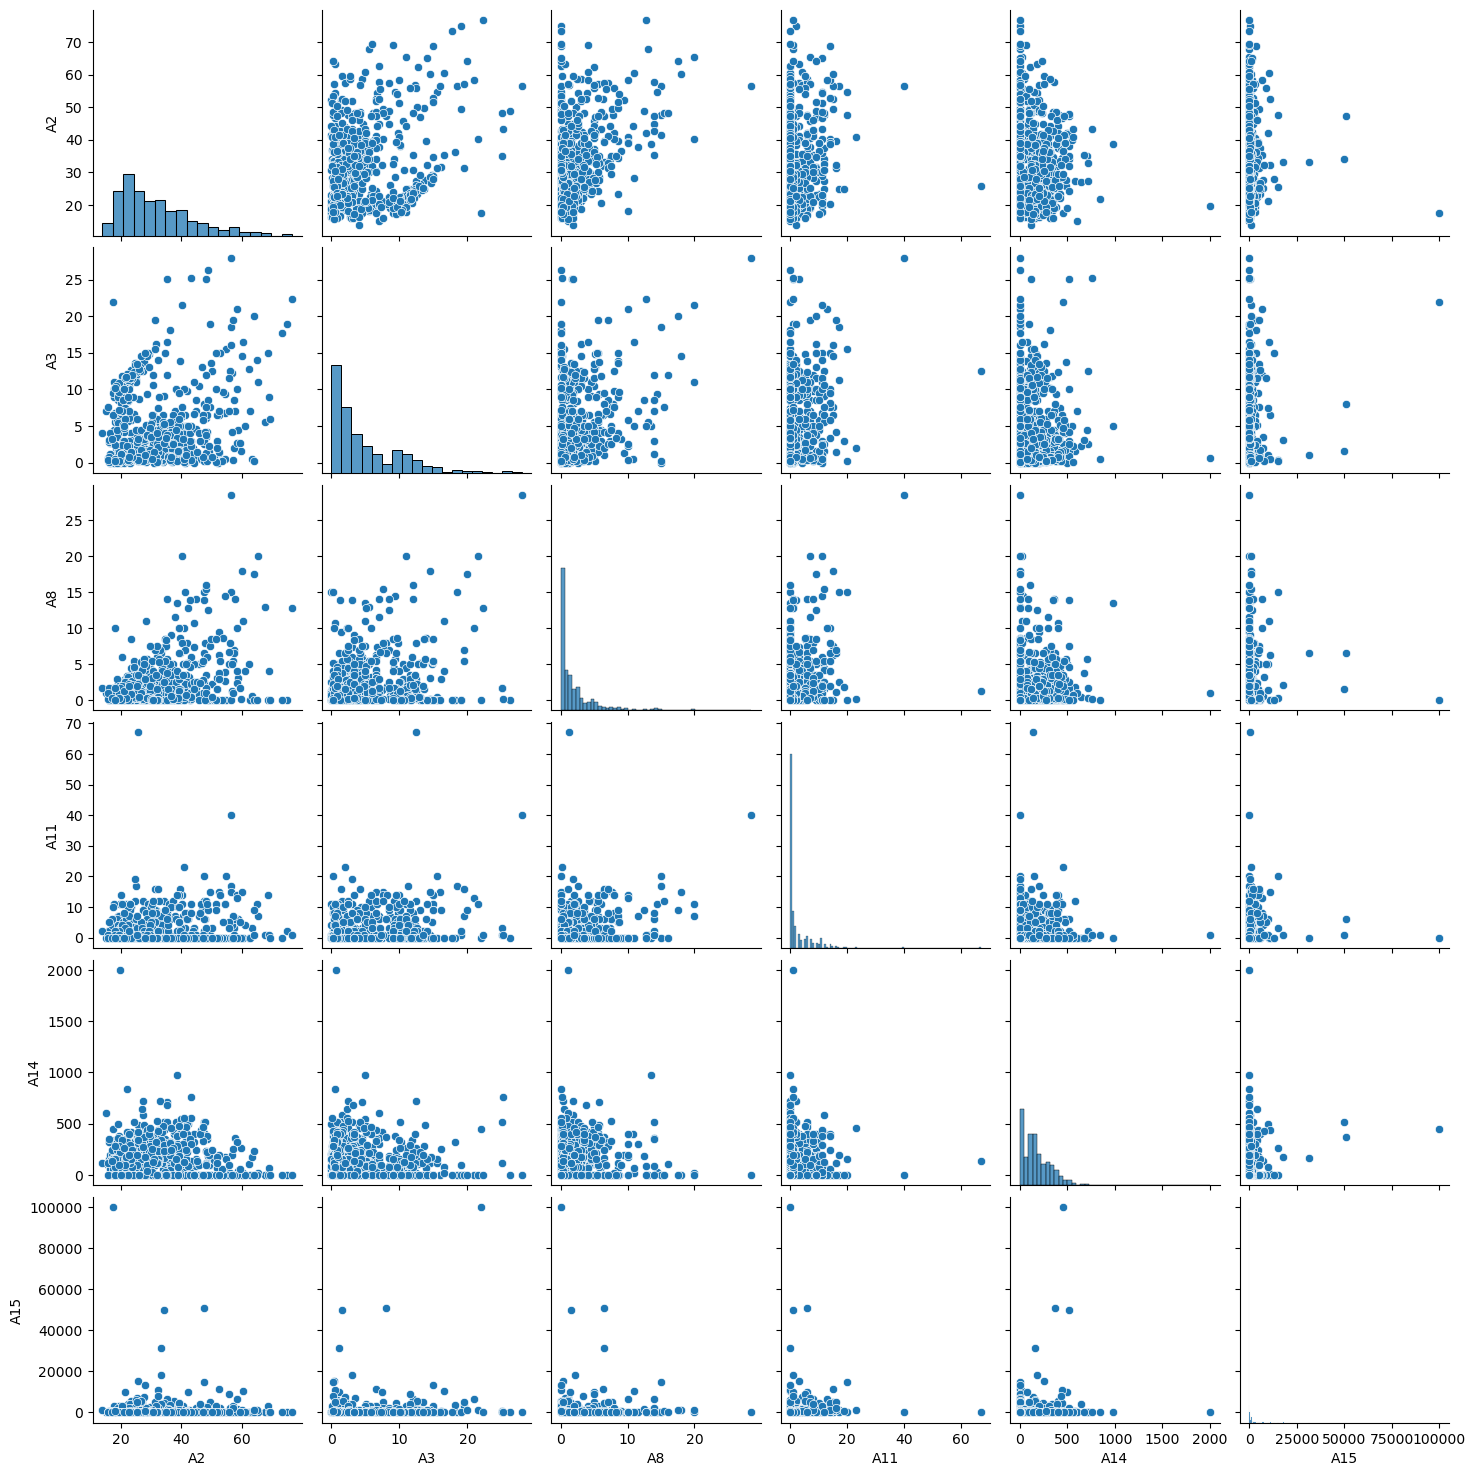

In [12]:
# Check correlation between variables
sns.pairplot(data=data)

From above plots we cannot see any interesting patterns between variables, data is skewed so we will normalize it later.

In [13]:
# Print summary statistics
data.describe()

,A2,A3,A8,A11,A14,A15
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,31.503813,4.829533,2.244296,2.502297,180.359877,1013.761103
std,11.838267,5.027077,3.371120,4.968497,168.296811,5253.278504
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,0.165000,0.000000,73.000000,0.000000
50%,28.420000,2.835000,1.000000,0.000000,160.000000,5.000000
75%,38.250000,7.500000,2.625000,3.000000,272.000000,400.000000
max,76.750000,28.000000,28.500000,67.000000,2000.000000,100000.000000


### Encode categorical variables

Before splitting the data and training the model, we need to deal with categorical variables. To encode them, we will use LabelEncoding.

In [14]:
data.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14      int32
A15      int64
A16     object
dtype: object

In [15]:
# Select column with 'object' type
data.select_dtypes('object').columns

Index(['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A16'], dtype='object')

In [16]:
# Initialize LabelEncoder
le = LabelEncoder()

# Iterate throught all columns and apply LabelEncoder to categorical variables
for col in data.select_dtypes('object').columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120,0,0


### Create feature and target variables

In [17]:
# Feature variables
X = data.drop(columns='A16', axis=1)
X

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43,560
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280,824
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100,3
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,260,0
686,0,22.67,0.750,1,0,1,7,2.00,0,1,2,1,0,200,394
687,0,25.25,13.500,2,2,5,2,2.00,0,1,1,1,0,200,1
688,1,17.92,0.205,1,0,0,7,0.04,0,0,0,0,0,280,750


In [18]:
# Target variable
y = data['A16']
y

0      0
1      0
2      0
3      0
4      0
      ..
685    1
686    1
687    1
688    1
689    1
Name: A16, Length: 653, dtype: int32

### Check if data is imbalanced

In [19]:
y.value_counts()

A16
1    357
0    296
Name: count, dtype: int64

The dataset is balanced, there is no need to use SMOTE.

### Split the data into training and test set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Data normalization

In [21]:
# Initialize the StandarScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Training the model

To choose the best algorithm we will try training three different models with different parameters using `RandomizedSearchCV`.

#### Random Forest

In [56]:
# RandomizedSearchCV
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'criterion':['gini','entropy'],
              'min_samples_split':np.arange(2, 10, step=2)
          }

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train the model 
rf_random = RandomizedSearchCV(rf, rs_space, n_iter = 100, scoring='accuracy', n_jobs=-1, cv=5)

rf_model = rf_random.fit(X_train_scaled, y_train)

# Print RandomSearchCV result
print('Best RandomSearch hyperparameters: ', rf_model.best_params_)
print('Best RandomSearch score: ', rf_model.best_score_)

Best RandomSearch hyperparameters:  {'n_estimators': 60, 'min_samples_split': 2, 'max_depth': 10, 'criterion': 'entropy'}
Best RandomSearch score:  0.8861920688007645


In [57]:
# Train RandomForestClassifier with best parameters
random_forest = RandomForestClassifier(n_estimators=60, min_samples_split=2,
                                       max_depth=10, criterion='entropy')

random_forest = random_forest.fit(X_train_scaled,y_train)

#### Logistic Regression

In [58]:
# Initialize Logistic Regression
lr = LogisticRegression(solver='liblinear',tol=1e-2, max_iter=100,
                              random_state=0)

distributions = dict(C = uniform(loc=0,scale=4), penalty=['l2','l1'])

# RandomizedSearch CV
lr_model = RandomizedSearchCV(lr, distributions, random_state=42)

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Print results
print('Best RandomSearch hyperparameters: ', lr_model.best_params_)
print('Best RandomSearch score: ', lr_model.best_score_)

Best RandomSearch hyperparameters:  {'C': 1.49816047538945, 'penalty': 'l2'}
Best RandomSearch score:  0.8751075011944577


In [59]:
# Train LogisticRegression with best parameters
logistic_reg = LogisticRegression(C=1.49816047538945, penalty='l2')

logistic_reg = logistic_reg.fit(X_train_scaled,y_train)

### Make predictions

In [61]:
# RandomForestClassifier

y_pred_rf = random_forest.predict(X_test_scaled)
y_pred_rf

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [62]:
# Logistic Regression
y_pred_lr = logistic_reg.predict(X_test_scaled)
y_pred_lr

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1])

### Model evaluation

Now we will compare results from Random Forest and Logistic Regression. Most useful metrics can be obtained from Classification report.

In [63]:
# Random Forest
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        86
           1       0.87      0.89      0.88       110

    accuracy                           0.86       196
   macro avg       0.86      0.86      0.86       196
weighted avg       0.86      0.86      0.86       196



In [64]:
# Random Forest
print(round(roc_auc_score(y_test,y_pred_rf),2))

0.86


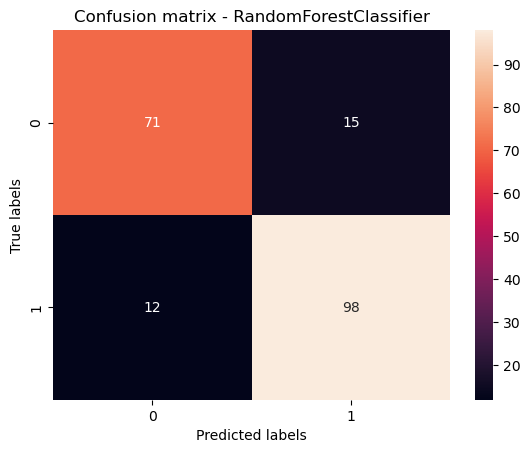

In [65]:
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix - RandomForestClassifier')
plt.show()

In [66]:
# Logistic Regression
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84        86
           1       0.90      0.82      0.86       110

    accuracy                           0.85       196
   macro avg       0.85      0.85      0.85       196
weighted avg       0.85      0.85      0.85       196



In [67]:
# Logistic Regression
print(round(roc_auc_score(y_test,y_pred_lr),2))

0.85


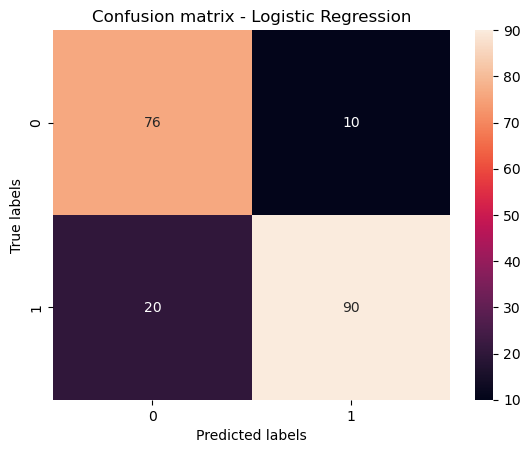

In [68]:
sns.heatmap(confusion_matrix(y_test,y_pred_lr), annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix - Logistic Regression')
plt.show()

### Conclusion

In this case study we used real dataset to predict wheteher an applicant will get a credit card approval or not. To conduct our analysis we used two different classification algorithms: **Random Forest** and **Logistic Regression**. To find the best hyperparameters **RandomizedSearchCV** was implemented. We trained our models with the best hyperparameters and then compared their performance. We can conclude that (slightly) better results gives us Random Forest Classifier.